In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
data = pd.read_csv("/content/drive/MyDrive/DSCI599/AirBnB Data/Combined Listing Data [Summary].csv")

<ipython-input-116-c2db7303094d>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/DSCI599/AirBnB Data/Combined Listing Data [Summary].csv")


In [117]:
data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,295,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,110,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,600,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv


In [118]:
data.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Scrape File'],
      dtype='object')

In [119]:
data.shape

(1633610, 18)

In [120]:
data['room_type'].value_counts()

Entire home/apt    1011930
Private room        550908
Shared room          66907
Hotel room            3865
Name: room_type, dtype: int64

In [121]:

data['neighbourhood_group'].value_counts()

City of Los Angeles     859933
Other Cities            405412
Unincorporated Areas     85349
Name: neighbourhood_group, dtype: int64

In [122]:
data['month'] = data['Scrape File'].str.replace("los_angeles_", "", regex = False).str.replace("_listings.csv", "", regex = False)

In [123]:
data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File,month
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv,2015_05
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv,2015_05
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,295,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv,2015_05
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,110,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv,2015_05
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,600,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv,2015_05


# Own work

## Description
1. How has the pandemic affected the AirBnB market?
2. Are your results driven by changes in price, changes in the type of listing, changes in availability, changes in listing types, or something else?

### Number of reviews per month

In [124]:
print(data['last_review'].isnull().sum()/len(data['last_review']))
#data['last_review'] = pd.to_datetime(data['last_review'])

0.21043578332649776


Unnamed: 0                             0
id                                     0
name                                  62
host_id                                0
host_name                           4930
neighbourhood_group               215605
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                            0
reviews_per_month                    185
calculated_host_listings_count         0
availability_365                      11
Scrape File                            0
month                                  0
dtype: int64


<ipython-input-125-3afda7dda8a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lr['last_review'] = pd.to_datetime(data_lr['last_review'])


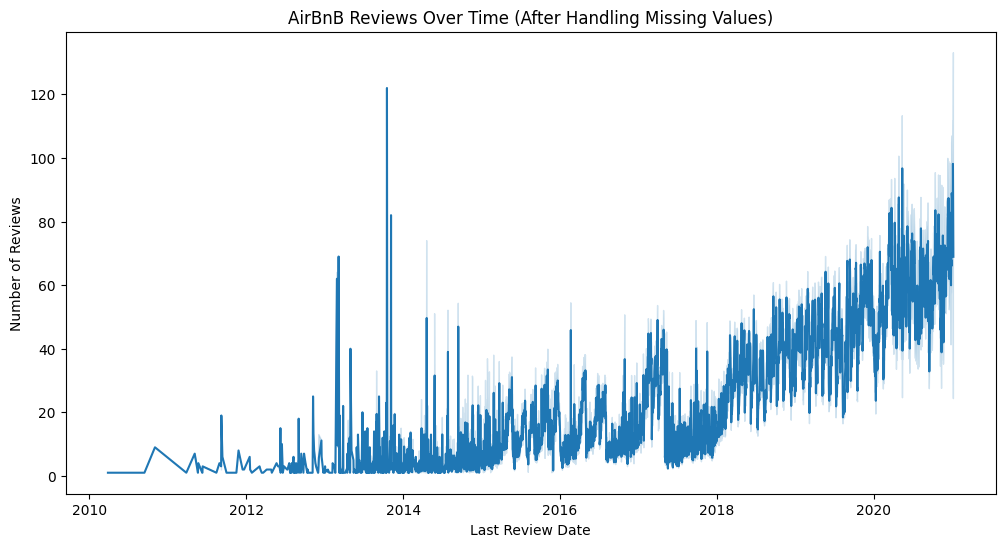

In [125]:
data_lr = data.dropna(subset=['last_review'])
print(data_lr.isnull().sum())
data_lr['last_review'] = pd.to_datetime(data_lr['last_review'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='last_review', y='number_of_reviews', data=data_lr)
plt.title('AirBnB Reviews Over Time (After Handling Missing Values)')
plt.xlabel('Last Review Date')
plt.ylabel('Number of Reviews')
plt.show()

The plot above suggests that there might be a slight increase the number of reviews per month due to the pandemic. Let's dive into this deeper by comparing the trends 12 months before and after the pandemic started which is marked to be March 2020.

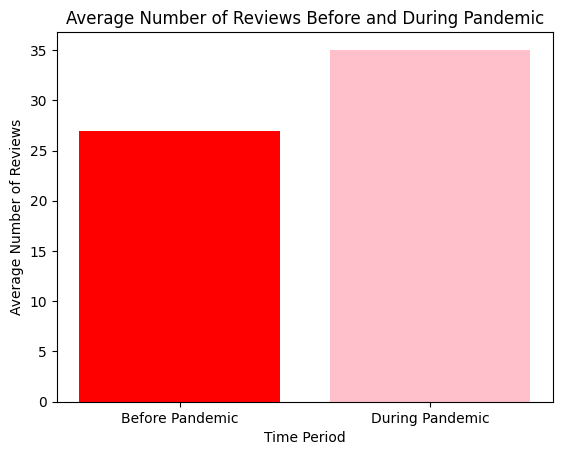

In [126]:
reviews_before = data[data['month'] < '2020-03']['number_of_reviews'].mean()
reviews_during = data[data['month'] >= '2020-03']['number_of_reviews'].mean()


average_reviews = [reviews_before, reviews_during]
labels = ['Before Pandemic', 'During Pandemic']

plt.bar(labels, average_reviews, color=['red', 'pink'])
plt.title('Average Number of Reviews Before and During Pandemic')
plt.xlabel('Time Period')
plt.ylabel('Average Number of Reviews')
plt.show()


<ipython-input-127-e49f29498f73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['last_review'] = pd.to_datetime(data_filtered['last_review'])


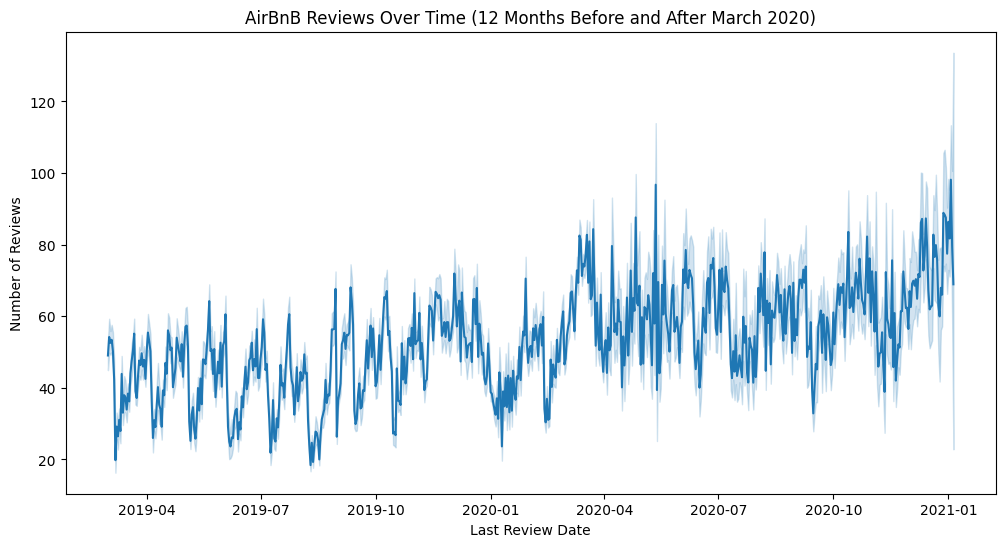

In [127]:
march_2020 = pd.to_datetime('2020-03-01')
data_filtered = data_lr[(data_lr['last_review'] >= march_2020 - pd.DateOffset(months=12)) &
                        (data_lr['last_review'] <= march_2020 + pd.DateOffset(months=12))]

data_filtered['last_review'] = pd.to_datetime(data_filtered['last_review'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='last_review', y='number_of_reviews', data=data_filtered)
plt.title('AirBnB Reviews Over Time (12 Months Before and After March 2020)')
plt.xlabel('Last Review Date')
plt.ylabel('Number of Reviews')
plt.show()

Number of Reviews per Month: There was a slight increase in the number of reviews per month after the pandemic began, but this change could be influenced by factors other than the pandemic itself. The slight increase in the number of reviews per month after the pandemic began could indicate either a greater propensity for guests to leave reviews during the pandemic or a change in the type of guests or stays that are more likely to generate reviews.

### Pricing

In [128]:
average_price_before = data[data['month'] < '2020-03']['price'].mean()
average_price_during = data[data['month'] >= '2020-03']['price'].mean()

print(f'Average Price Before Pandemic: {average_price_before}')
print(f'Average Price During Pandemic: {average_price_during}')


Average Price Before Pandemic: 197.61692813120118
Average Price During Pandemic: 226.06819772615364


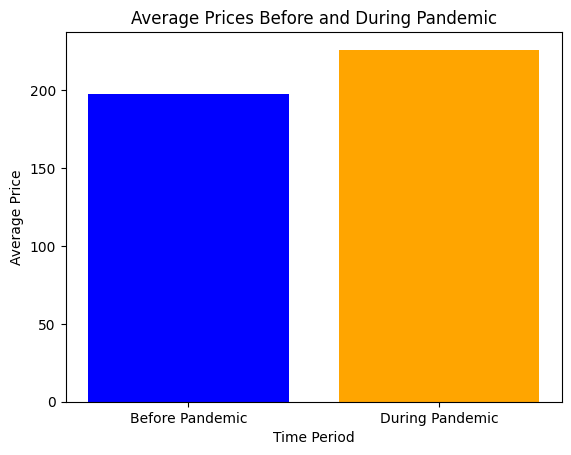

In [129]:
average_prices = [average_price_before, average_price_during]
labels = ['Before Pandemic', 'During Pandemic']

plt.bar(labels, average_prices, color=['blue', 'orange'])
plt.title('Average Prices Before and During Pandemic')
plt.xlabel('Time Period')
plt.ylabel('Average Price')
plt.show()

The average price analysis shows that there was an increase in the average price during the pandemic compared to before.
This information suggests that, on average, Airbnb prices were higher during the pandemic period. This trend might reflect a shift in the types of properties being rented out, or it could be a response to decreased demand, with hosts raising prices to maintain revenue.

### Booking and Availability

Average Availability Before Pandemic: 181.574494773047
Average Availability During Pandemic: 167.97841634484388


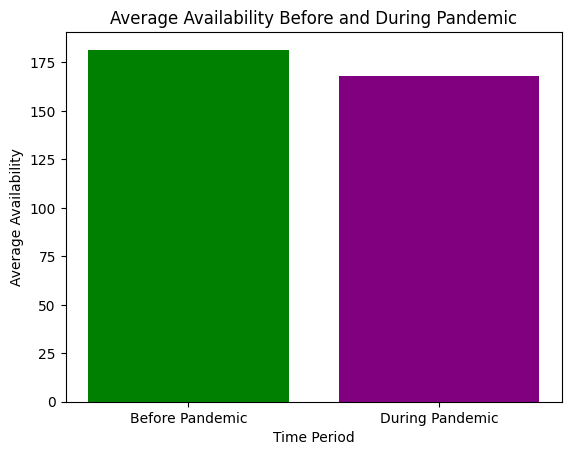

In [130]:
availability_before = data[data['month'] < '2020-03']['availability_365'].mean()
availability_during = data[data['month'] >= '2020-03']['availability_365'].mean()

print(f'Average Availability Before Pandemic: {availability_before}')
print(f'Average Availability During Pandemic: {availability_during}')

availability_values = [availability_before, availability_during]
labels = ['Before Pandemic', 'During Pandemic']

plt.bar(labels, availability_values, color=['green', 'purple'])
plt.title('Average Availability Before and During Pandemic')
plt.xlabel('Time Period')
plt.ylabel('Average Availability')
plt.show()

Booking and Availability: The analysis shows a  notable decrease in the average availability of listings during the pandemic, indicating fewer available listings compared to the period before the pandemic. This could be due to a reduction in the number of active listings, as hosts might have withdrawn from the market due to decreased demand or health concerns.



### Room type distribution before and during pandemic

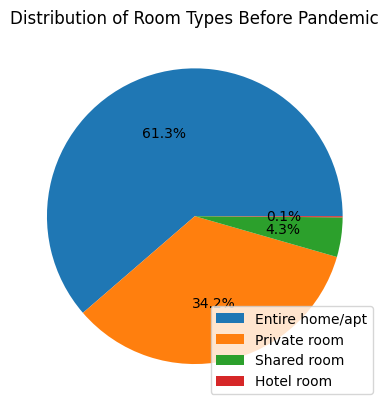

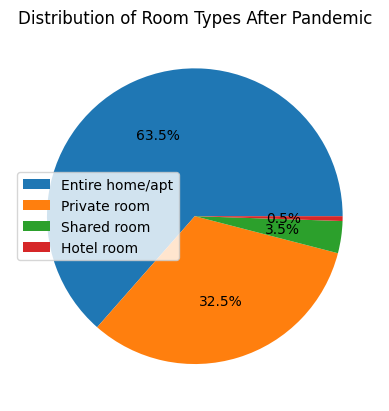

In [131]:
room_type_counts_before = data[data['month'] < '2020-03']['room_type'].value_counts()

room_type_counts_before.plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.title('Distribution of Room Types Before Pandemic')
plt.ylabel('')
plt.show()

room_type_counts_after = data[data['month'] >= '2020-03']['room_type'].value_counts()
room_type_counts_after.plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.title('Distribution of Room Types After Pandemic')
plt.ylabel('')
plt.show()

In [132]:
print(room_type_counts_before)
print(room_type_counts_after)

Entire home/apt    724265
Private room       403924
Shared room         51027
Hotel room           1505
Name: room_type, dtype: int64
Entire home/apt    287665
Private room       146984
Shared room         15880
Hotel room           2360
Name: room_type, dtype: int64


<Figure size 1000x600 with 0 Axes>

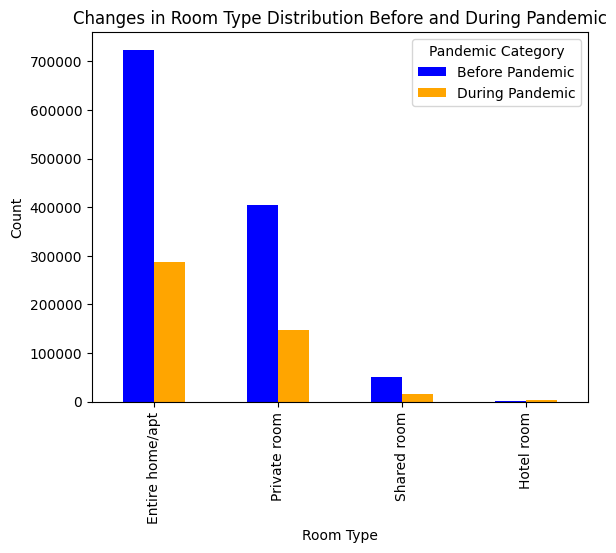

In [133]:
room_type_counts_before = data[data['month'] < '2020-03']['room_type'].value_counts()
room_type_counts_during = data[data['month'] >= '2020-03']['room_type'].value_counts()
room_type_counts = pd.concat([room_type_counts_before, room_type_counts_during], axis=1, keys=['Before Pandemic', 'During Pandemic'])
plt.figure(figsize=(10, 6))
room_type_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Changes in Room Type Distribution Before and During Pandemic')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Pandemic Category')
plt.show()


In absolute terms, the covid pandemic affected the market significantly by cutting down the number of listings by almost 60%.
However in relative terms, there is an overall increase in the percentage of hotel rooms and shared rooms after the pandemic.
The percentage of private rooms has decreased, while the percentage of entire homes has increased.
This shift could indicate a change in consumer preference or availability of different room types during the pandemic.
Further analyzing the reason behind the shifts in room type preferences.

                     Before      During  Percent Change
room_type                                              
Entire home/apt  270.632665  293.759889        8.545614
Hotel room       214.972718  363.024878       68.870209
Private room      89.328869  108.268974       21.202670
Shared room       55.428553   56.615141        2.140753


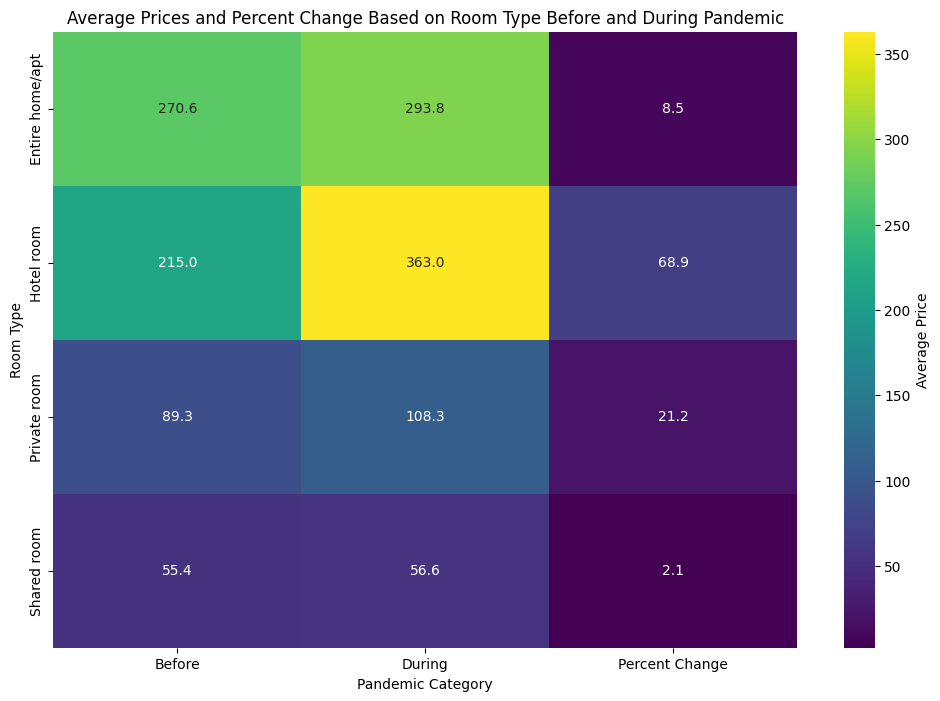

In [134]:
data['month'] = pd.to_datetime(data['month'], format='%Y_%m')
data['pandemic_category'] = ['Before' if month < pd.to_datetime('2020-03-01') else 'During' for month in data['month']]
pivot_table_prices = data.pivot_table(values='price', index='room_type', columns='pandemic_category', aggfunc='mean')
pivot_table_prices.columns = ['Before', 'During']
pivot_table_prices['Percent Change'] = ((pivot_table_prices['During'] - pivot_table_prices['Before']) / pivot_table_prices['Before']) * 100
print(pivot_table_prices)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_prices, cmap='viridis', annot=True, fmt=".1f", cbar_kws={'label': 'Average Price'})
plt.title('Average Prices and Percent Change Based on Room Type Before and During Pandemic')
plt.xlabel('Pandemic Category')
plt.ylabel('Room Type')
plt.show()

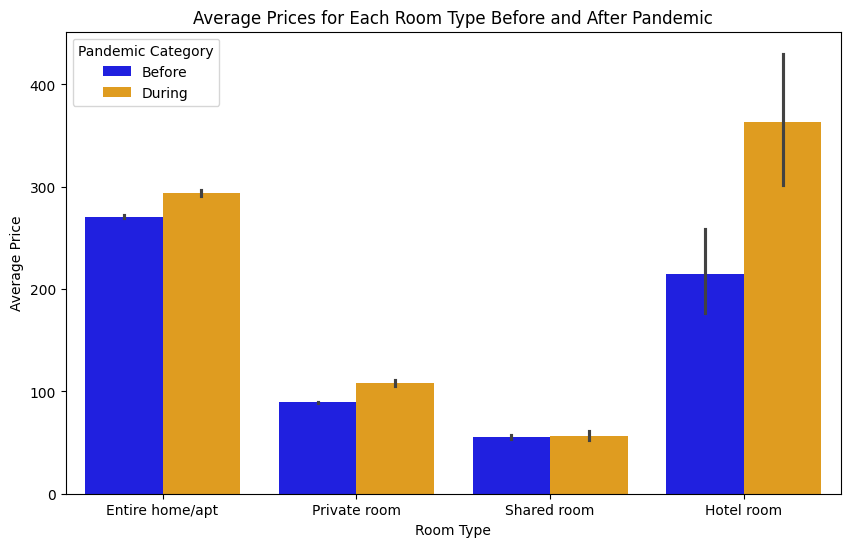

In [135]:
data['month'] = pd.to_datetime(data['month'], format='%Y_%m')
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', hue='pandemic_category', data=data, palette=['blue', 'orange'])
plt.title('Average Prices for Each Room Type Before and After Pandemic')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.legend(title='Pandemic Category')
plt.show()

Entire Home/Apartment: A modest increase in average price, suggesting a steady demand for privacy and entire spaces during the pandemic.

Hotel Room: A significant price increase, possibly due to hotels adjusting to lower occupancy by increasing prices or a shift in consumer preference for professional hospitality services during the pandemic.

Private Room: A noticeable price increase, which could reflect a compromise between cost and privacy for travelers during the pandemic.

Shared Room: A marginal price increase, indicating this room type was less affected by the pandemic, potentially due to already low prices or decreased demand for shared spaces due to health concerns.

### Correlation between factors

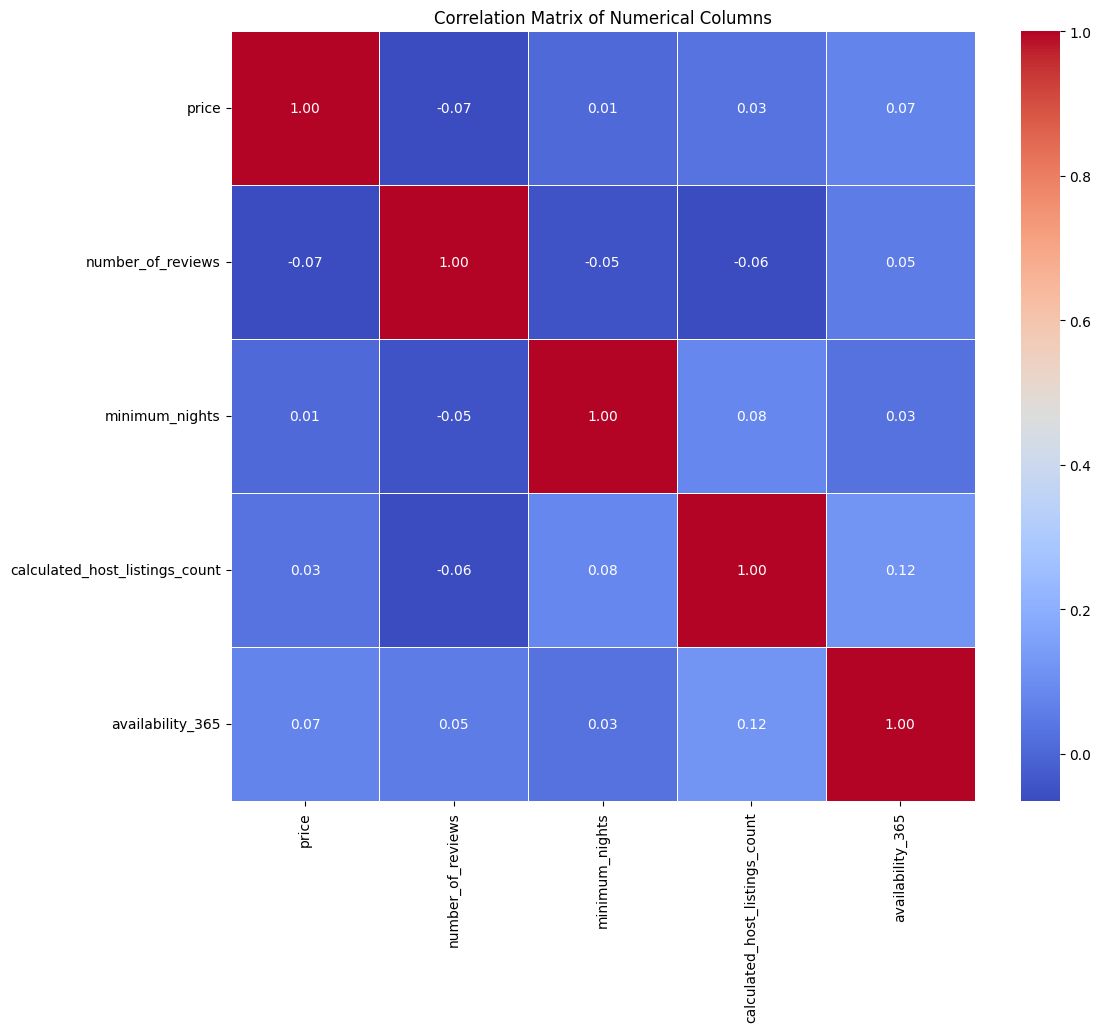

In [136]:
numerical_columns = ['price', 'number_of_reviews', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']
correlation_data = data[numerical_columns]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


Price and Number of Reviews: There's a slightly negative correlation, suggesting that higher-priced listings may not necessarily receive more reviews. This could indicate that guests are less inclined to book or review more expensive listings.

Price and Availability: The positive correlation is weak, hinting that higher prices do not significantly relate to higher or lower availability throughout the year.

Number of Reviews and Availability: There's a small positive correlation, suggesting listings with more reviews might be slightly more available. This could be due to successful listings being available more often to capitalize on their popularity.

Minimum Nights and Calculated Host Listings Count: The correlation is very weak, indicating no significant relationship between the minimum stay required and the number of listings a host manages.

Calculated Host Listings Count and Availability: A somewhat positive correlation suggests that hosts with more listings might have slightly higher availability, possibly because they can offer more options throughout the year.

### Conclusion

The COVID-19 pandemic has had a multifaceted impact on the Airbnb market. It led to a reduction in the overall number of listings and changes in the types of available listings, with a relative increase in hotel and shared rooms. Despite the decrease in availability, there was an increase in the average price of listings. The pandemic also slightly increased the number of reviews per month, although this change could be due to a combination of factors. It led to an increase in the average price of listings, a shift in the type of rooms being rented, and a decrease in availability, suggesting a contraction in the market. These factors together suggest that the pandemic not only changed the market dynamics but also influenced consumer behavior and preferences in the Airbnb ecosystem. The subtle shifts in the correlation matrix indicate that while individual behavior may have changed, the broader market dynamics maintained a degree of consistency. The correlation analysis provides further insights into how these variables interplay in the Airbnb market during the pandemic. Overall, the market has shown resilience, with adjustments in pricing and room types to meet new consumer demands during the pandemic.